In [1]:
import matplotlib.pyplot as plt
import rebound
import time
import numpy as np
plt.close()

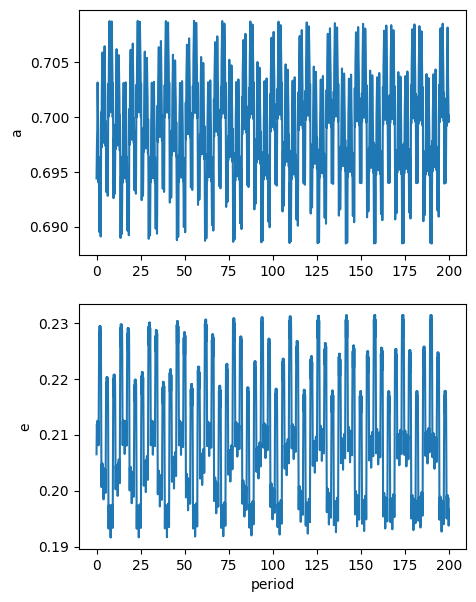

In [43]:
Msun = 1
Mjyp = 0.001

a0 = 0.6944
e0 = 0.2065

aj = a0 * (0.564)**(-2/3)

sim = rebound.Simulation()
sim.add(m=Msun)
sim.add(m = Mjyp, a = aj)
sim.add(m=0, a=a0, e=e0)

p_orb    = sim.orbits()[0].P
Noutputs = 10000
num_orb  = 200
times    = np.linspace(0, num_orb*p_orb, Noutputs)

tp_a = np.zeros(Noutputs)
tp_e = np.zeros(Noutputs)
tp_x = np.zeros(Noutputs)
tp_y = np.zeros(Noutputs)


tp_x[0] = sim.particles[1].x
tp_y[0] = sim.particles[1].y

tp_a[0] = sim.orbits()[1].a
tp_e[0] = sim.orbits()[1].e

for i, t in enumerate(times):
    sim.integrate(t)
    tp_a[i] = sim.orbits()[1].a
    tp_e[i] = sim.orbits()[1].e
    tp_x[i] = sim.particles[2].x
    tp_y[i] = sim.particles[2].y


fig = plt.figure(figsize=(5,7))
fig.tight_layout()
ax1 = plt.subplot(211)
ax2 = plt.subplot(212)

ax1.plot(times / p_orb, tp_a)
ax2.plot(times / p_orb, tp_e)

ax1.set_ylabel("a")
ax2.set_ylabel("e")
ax2.set_xlabel("period")
plt.show()

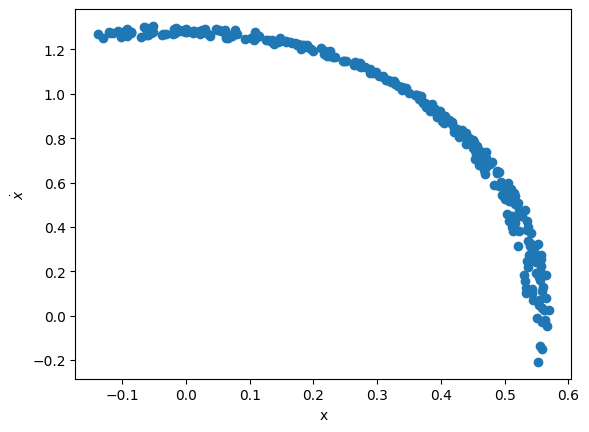

In [44]:
tp_dxdt = np.gradient(tp_x, times)
tp_dydt = np.gradient(tp_y, times)


tol  = 1e-1
ind_0 = np.where(np.abs(tp_y) < tol)

ind_y = np.where(tp_dydt[ind_0] > 0)


dxdt = tp_dxdt[ind_0][ind_y]
x    = tp_x[ind_0][ind_y]

plt.scatter(x, dxdt)
plt.xlabel("x")
plt.ylabel(r"$\dot{x}$")
plt.show()